# Containerized QUICK Benchmark Analysis
This notebook shows the performance comparison of containerized QUICK on various GPUs using the molecule [taxol](../input/taxol.in).

In [1]:
# imports
import pandas as pd

In [2]:
# Load compiled output data
results_filepath = "./results.csv"
results = pd.read_csv(results_filepath)
results["datetime"] = pd.to_datetime(results["datetime"], format="%a %b %d %H:%M:%S %Y")
results.head()

,gpu_type,gpu_count,containerized,molecule,scf_time,gradient_time,total_time,system,datetime
0,NVIDIA-A100-PCIE-40GB,1,True,morphine,6.643246,8.074201,18.963636,expanse,2024-01-18 10:36:59
1,NVIDIA-A100-PCIE-40GB,2,True,morphine,4.214635,4.474140,13.116883,expanse,2024-01-18 10:37:19
2,NVIDIA-A100-PCIE-40GB,3,True,morphine,3.806321,3.318024,11.496085,expanse,2024-01-18 10:37:33
3,NVIDIA-A100-PCIE-40GB,1,True,psb5,1.299491,1.280677,19.505161,expanse,2024-01-18 10:36:26
4,NVIDIA-A100-PCIE-40GB,2,True,psb5,0.904503,0.755967,5.493714,expanse,2024-01-18 10:36:47


In [3]:
results.dtypes

gpu_type                 object
gpu_count                 int64
containerized              bool
molecule                 object
scf_time                float64
gradient_time           float64
total_time              float64
system                   object
datetime         datetime64[ns]
dtype: object

# Taxol Timings for Single GPUs

In [4]:
# Get dataframe with gpu_type, scf_time, gradient_time & total_time where gpu_count = 1 and molecule=taxol
gpu_count_filter = results["gpu_count"] == 1
molecule_filter = results["molecule"] == "taxol"

taxol_timings = results[["gpu_type", "scf_time", "gradient_time", "total_time", "datetime"]].where(gpu_count_filter & molecule_filter)
taxol_timings.dropna(inplace=True)
taxol_timings = taxol_timings.sort_values(["total_time","datetime"])
taxol_timings

,gpu_type,scf_time,gradient_time,total_time,datetime
6,NVIDIA-A100-PCIE-40GB,32.691907,50.558595,90.050375,2024-01-18 10:37:45
180,NVIDIA-A100-80GB-PCIe,32.826639,50.668244,94.558451,2024-01-05 00:33:12
168,NVIDIA-A100-80GB-PCIe,33.022493,50.690760,94.835815,2023-12-15 16:47:04
128,NVIDIA-A100-80GB-PCIe,33.201645,50.740466,95.887682,2023-12-01 21:58:49
142,NVIDIA-A100-80GB-PCIe,33.107761,50.818803,95.957835,2023-12-01 22:33:24
156,NVIDIA-A100-80GB-PCIe,33.218616,50.820309,96.002668,2023-12-11 19:14:21
90,NVIDIA-GeForce-RTX-4090,66.570317,33.286316,110.559730,2024-01-10 16:51:47
114,NVIDIA-A100-80GB-PCIe,58.530119,51.449317,121.925780,2023-12-01 20:40:37
102,NVIDIA-A100-80GB-PCIe,58.682667,51.409130,122.372365,2023-11-30 16:53:44
18,Tesla-V100-SXM2-32GB,62.387076,72.390627,142.295767,2023-12-05 17:19:32


In [5]:
# If more than one timing is present, select the most recent timing

# Find the index of the row with max datetime for each GPU
max_datetime_idx = taxol_timings.groupby("gpu_type")["datetime"].idxmax()

# Get the corresponding rows
most_recent_taxol_timings = taxol_timings.loc[max_datetime_idx]
most_recent_taxol_timings

,gpu_type,scf_time,gradient_time,total_time,datetime
180,NVIDIA-A100-80GB-PCIe,32.826639,50.668244,94.558451,2024-01-05 00:33:12
6,NVIDIA-A100-PCIE-40GB,32.691907,50.558595,90.050375,2024-01-18 10:37:45
42,NVIDIA-GeForce-GTX-1080,366.045118,280.502213,666.499745,2024-01-08 23:30:21
54,NVIDIA-GeForce-GTX-1080-Ti,265.092521,205.498805,487.916609,2024-01-09 17:02:26
66,NVIDIA-GeForce-RTX-2080-Ti,170.513679,109.736870,299.035471,2024-01-05 20:40:42
78,NVIDIA-GeForce-RTX-3090,151.647275,96.944185,262.651704,2024-01-06 02:44:48
90,NVIDIA-GeForce-RTX-4090,66.570317,33.286316,110.559730,2024-01-10 16:51:47
30,Tesla-V100-SXM2-32GB,63.744539,78.865300,150.134496,2023-12-15 08:44:58


## Total SCF Time

<Axes: xlabel='gpu_type'>

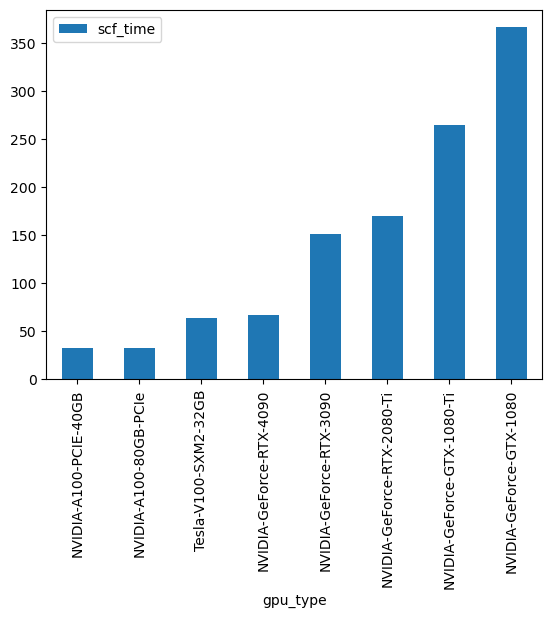

In [6]:
scf_time_graph = most_recent_taxol_timings.sort_values("scf_time").plot.bar(x="gpu_type", y="scf_time")
scf_time_graph

## Total Gradient Time

<Axes: xlabel='gpu_type'>

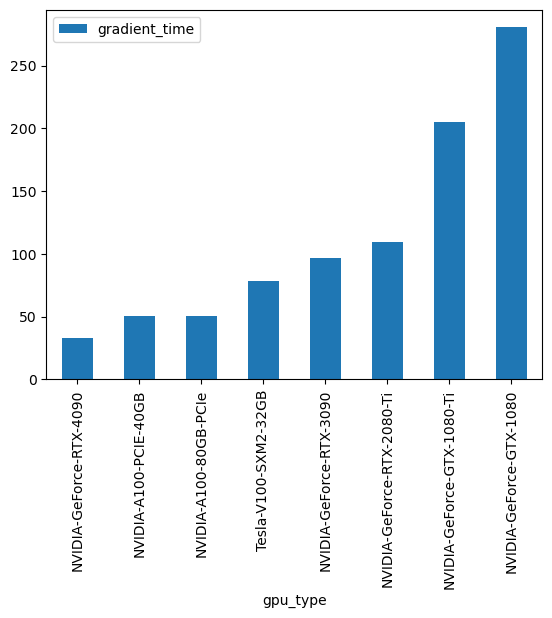

In [7]:
gradient_time_graph = most_recent_taxol_timings.sort_values("gradient_time").plot.bar(x="gpu_type", y="gradient_time")
gradient_time_graph

## Total Time

<Axes: xlabel='gpu_type'>

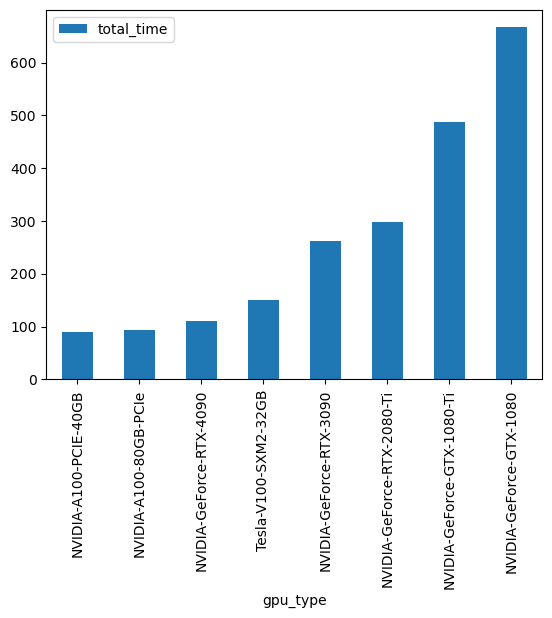

In [8]:
total_time_graph = most_recent_taxol_timings.sort_values("total_time").plot.bar(x="gpu_type", y="total_time")
total_time_graph